# <center>Cash4You<center>

Importing Required Packages

In [ ]:
pip install sweetviz

     |████████████████████████████████| 15.1MB 249kB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pylab as plt
import seaborn as sns
import sweetviz as sv

from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score

**Importing Data Set**




In [ ]:
Data = pd.read_csv('modelcash4u.csv', index_col =0, header =0)
print (Data)

        ETD60_6MTH Active_Mortgage_Indicator  Ever_NetNew  ... MS01 MS28  SL02
EID                                                        ...                
214              0                         Y            0  ...    1    0     0
216              1                         N            0  ...    0    0     0
240              0                         N            0  ...    0    0     0
243              0                         N            0  ...    0    0     1
250              0                         N            0  ...    0    0     0
...            ...                       ...          ...  ...  ...  ...   ...
203660           0                         N            0  ...    0    0     0
203674           0                         N            0  ...    0    0     0
203675           0                         N            0  ...    0    0     0
203687           0                         N            0  ...    0    0     0
203712           1                         N        

## EDA Using SweetViz

In [ ]:
Analyze_data = sv.analyze([Data,"Data1"],target_feat= 'ETD60_6MTH')

PAIRWISE CALCULATION LENGTH WARNING: There are 354 features in this dataframe and the 'pairwise_analysis' parameter is set to 'auto'.
Pairwise analysis is exponential in length: 354 features will cause ~125316 pairs to be evaluated, which could take a long time.

You must call the function with the parameter pairwise_analysis='on' or 'off' to explicitly select desired behavior.



In [ ]:
# Analyze_data.show_html('Report.html')

## Manual EDA

In [ ]:
Data.head(5)

,ETD60_6MTH,Active_Mortgage_Indicator,Ever_NetNew,Gender,Marital,age,Num_of_Dependents,c_2to3yr_bal_gt0,c_2to3yr_bal_gt500,c_2to3yr_bal_gt1000,c_CurrentBalance,c_OriginalAmount,c_comp_2to3yr_bal_gt0,c_comp_2to3yr_bal_gt500,c_comp_curBal,c_comp_last_Date_lt_1yr,c_comp_lt_1yr_bal_gt0,c_last_DateReport_lt_1yr,c_lt_1yr_bal_gt0,c_lt_1yr_bal_gt500,c_lt_1yr_bal_gt1000,c_num_of_comp_bal_gt0,c_num_of_col_bal_gt0,AGG1Ratio,AGG1Slope123,AGG1SlopeRatio,AGG2Ratio,AGG2Slope123,AGG2SlopeRatio,AGG301,AGG3Ratio,AGG3Slope123,AGG3SlopeRatio,AGG4Ratio,AGG4Slope123,AGG4SlopeRatio,AGG5Ratio,AGG5Slope123,AGG5SlopeRatio,AGG6Ratio,...,FI80,GO04,GO07,GO116_fixed,GO132,GO143,GO15,GO16,GO19,GO31,IN01,IN02,IN05,IN18,IN21,IN36,IN51,IN64,IN65,IN76,IN78,IN79,PR09,PR31,PR32,PR118_yrs,PR35_yrs,PR36_yrs,PR38_yrs,PR42,RE01,RE02,RE05,RE06,RE334,RR01,RR02,MS01,MS28,SL02
EID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
214,0,Y,0,M,D,54,2,0,0,0,-1,-1,0,0,-1,0,0,0,0,0,0,0,0,0.0,-6600,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,-105,0.0,0,...,0,6,17,1,2,-1,0,0,0,0,14,1,0,0,15,56,0,0,0,0,0,0,0,0,0,4,4,7,999,0,12,1,0,0,27458,4,0,1,0,0
216,1,N,0,F,S,37,2,0,0,0,1547,1377,0,0,-1,0,0,0,0,0,0,0,1,30.0,495,0.0,0.0,0,0.0,0,0.0,0,0.0,45.0,8580,-30.0,0.0,75,0.0,0,...,0,32,1,1,4,1,0,2,0,7,14,5,3,0,1,49,0,0,0,0,0,0,1,0,0,3,3,4,5,1,4,1,0,0,1551,1,0,0,0,0
240,0,N,0,M,M,76,0,0,0,0,0,998,0,0,-1,0,0,0,0,0,0,0,0,0.0,2715,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,135,0.0,0.0,-15,0.0,0,...,0,21,1,1,78,1,0,1,1,2,10,1,0,0,5,14,1,0,0,0,0,0,3,0,0,5,5,12,4,0,2,1,0,0,3047,1,0,0,0,0
243,0,N,0,M,S,31,0,0,0,0,-1,-1,0,0,-1,0,0,0,0,0,0,0,0,0.0,8940,0.0,0.0,0,0.0,904,-1335.0,-60,15.0,0.0,0,0.0,0.0,60,0.0,0,...,0,28,3,1,75,3,0,0,1,2,9,4,0,0,5,999,0,0,0,0,0,0,0,0,0,999,999,999,999,0,2,1,0,0,4599,1,0,0,0,1
250,0,N,0,M,S,51,0,0,0,0,-1,-1,0,0,-1,0,0,0,0,0,0,0,0,-17865.0,4245,NaN,-6555.0,2310,NaN,0,0.0,0,NaN,-2235.0,75,NaN,-4260.0,1425,NaN,-4245,...,0,14,1,1,9,2,0,1,0,1,12,5,2,0,1,999,1,0,0,0,0,0,0,0,0,999,999,999,999,0,5,4,0,1,12997,0,0,0,0,0


In [ ]:
Data.tail(5)

,ETD60_6MTH,Active_Mortgage_Indicator,Ever_NetNew,Gender,Marital,age,Num_of_Dependents,c_2to3yr_bal_gt0,c_2to3yr_bal_gt500,c_2to3yr_bal_gt1000,c_CurrentBalance,c_OriginalAmount,c_comp_2to3yr_bal_gt0,c_comp_2to3yr_bal_gt500,c_comp_curBal,c_comp_last_Date_lt_1yr,c_comp_lt_1yr_bal_gt0,c_last_DateReport_lt_1yr,c_lt_1yr_bal_gt0,c_lt_1yr_bal_gt500,c_lt_1yr_bal_gt1000,c_num_of_comp_bal_gt0,c_num_of_col_bal_gt0,AGG1Ratio,AGG1Slope123,AGG1SlopeRatio,AGG2Ratio,AGG2Slope123,AGG2SlopeRatio,AGG301,AGG3Ratio,AGG3Slope123,AGG3SlopeRatio,AGG4Ratio,AGG4Slope123,AGG4SlopeRatio,AGG5Ratio,AGG5Slope123,AGG5SlopeRatio,AGG6Ratio,...,FI80,GO04,GO07,GO116_fixed,GO132,GO143,GO15,GO16,GO19,GO31,IN01,IN02,IN05,IN18,IN21,IN36,IN51,IN64,IN65,IN76,IN78,IN79,PR09,PR31,PR32,PR118_yrs,PR35_yrs,PR36_yrs,PR38_yrs,PR42,RE01,RE02,RE05,RE06,RE334,RR01,RR02,MS01,MS28,SL02
EID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
203660,0,N,0,M,S,49,0,0,0,0,0,662,0,0,0,1,0,1,0,0,0,0,0,-1380.0,-2115,NaN,-1155.0,-750,NaN,0,0.0,0,NaN,-1050.0,1185,NaN,-405.0,-675,NaN,-1155,...,0,12,0,1,27,0,1,1,1,5,4,1,2,0,2,999,0,0,0,0,0,0,1,0,0,9,9,12,1,0,2,2,1,1,2800,0,0,0,0,0
203674,0,N,0,M,M,28,0,0,0,0,0,1308,0,0,-1,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0,NaN,0,NaN,0,NaN,0.0,0,0.0,0.0,0,0.0,0,...,0,8,3,1,5,3,0,0,0,1,0,0,0,0,999,999,0,0,0,0,0,0,1,0,0,999,999,999,5,0,2,1,0,0,1300,0,0,0,0,0
203675,0,N,0,M,M,57,0,0,0,0,0,827,0,0,-1,0,0,0,0,0,0,0,0,0.0,375,0.0,0.0,0,0.0,5741,NaN,-75,NaN,0.0,0,0.0,0.0,-75,0.0,0,...,0,12,4,1,21,4,0,0,1,1,3,1,0,0,7,999,0,0,0,0,0,0,1,0,0,999,999,999,4,0,3,0,0,0,6000,1,0,0,0,0
203687,0,N,0,F,S,28,0,1,1,1,2393,1343,0,0,-1,0,0,0,0,0,0,0,1,0.0,165,0.0,0.0,0,NaN,0,NaN,0,NaN,0.0,-450,0.0,0.0,225,0.0,0,...,0,16,0,1,16,0,2,4,1,3,1,1,1,0,1,999,0,0,0,0,0,0,1,0,0,999,999,999,3,1,2,2,0,0,2550,0,0,0,0,0
203712,1,N,0,F,S,31,2,0,0,0,0,765,0,0,0,0,0,0,0,0,0,0,0,0.0,390,0.0,-930.0,0,NaN,0,0.0,0,0.0,15.0,0,0.0,-915.0,45,NaN,-930,...,0,22,0,9,10,0,3,4,0,4,7,2,0,0,4,52,1,0,0,0,0,0,1,0,0,999,999,999,2,0,3,2,0,1,2850,0,0,0,0,0


## Correlation matrix Heat MAP & Pair Plot

In [1]:
corr_ad_Data = Data.corr()
print (corr_ad_Data)

NameError: ignored

## **Dont Run Sns And heat map Takes longer time**

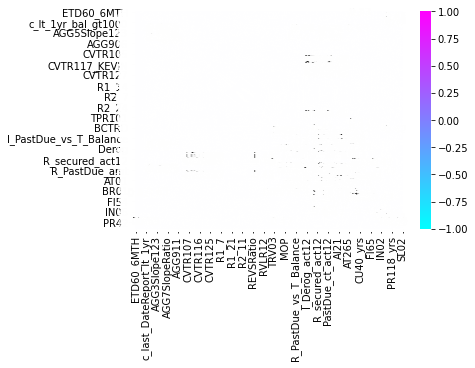

In [ ]:
%matplotlib inline
sns.heatmap(corr_ad_Data, vmin = -1, vmax = 1, annot = True, cmap= 'cool')

In [ ]:
# %matplotlib inline
# sns.pairplot(corr_ad_Data)

## Checking Unique values in the data set

In [2]:
Data.apply(lambda x: len(x.unique()))

NameError: ignored

## Describing the data set to understand the variables 5 point summary

In [ ]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
ETD60_6MTH,22620.0,0.090451,0.286833,0.0,0.0,0.0,0.0,1.0
Ever_NetNew,22620.0,0.249072,0.432485,0.0,0.0,0.0,0.0,1.0
age,22620.0,42.634660,13.516129,18.0,32.0,41.0,52.0,96.0
Num_of_Dependents,22620.0,0.600796,1.002256,0.0,0.0,0.0,1.0,10.0
c_2to3yr_bal_gt0,22620.0,0.150486,0.472683,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...
RR01,22620.0,0.707162,1.337384,0.0,0.0,0.0,1.0,16.0
RR02,22620.0,0.029355,0.176234,0.0,0.0,0.0,0.0,3.0
MS01,22620.0,0.405968,0.944290,0.0,0.0,0.0,0.0,15.0
MS28,22620.0,33062.055615,101236.470928,0.0,0.0,0.0,0.0,1384000.0


## To understand the data Type of the variables

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22620 entries, 214 to 203712
Columns: 354 entries, ETD60_6MTH to SL02
dtypes: float64(114), int64(237), object(3)
memory usage: 61.3+ MB


In [ ]:
Datanew1 = Data.copy()

## Filtering the categorical variables

In [ ]:
categorical_columns = [x for x in Datanew1.dtypes.index if Datanew1.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns 
                       if x not in ['Item_Identifier','Outlet_Identifier','source']]


## Printing the Categorical variables

In [ ]:
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (Datanew1[col].value_counts() )


Frequency of Categories for varible Active_Mortgage_Indicator
N    19617
Y     3003
Name: Active_Mortgage_Indicator, dtype: int64

Frequency of Categories for varible Gender
M    12553
F    10067
Name: Gender, dtype: int64

Frequency of Categories for varible Marital
S    11178
M     7328
C     2636
D     1456
Z       22
Name: Marital, dtype: int64


Text(0.5, 1, 'Active_Mortgage_Indicator')

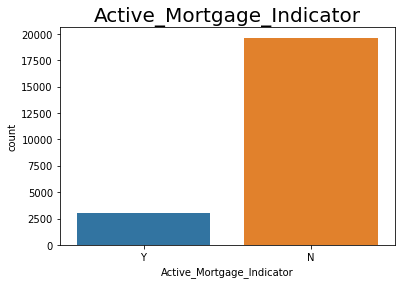

In [ ]:
%matplotlib inline

sns.countplot(Data['Active_Mortgage_Indicator'])
plt.title("Active_Mortgage_Indicator", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Marital Status')

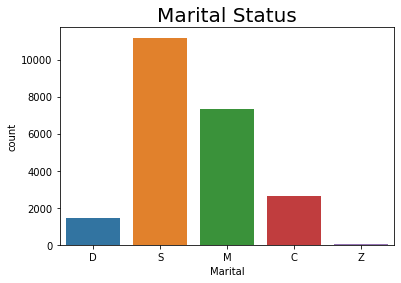

In [ ]:
%matplotlib inline

sns.countplot(Data['Marital'])
plt.title("Marital Status", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Gender')

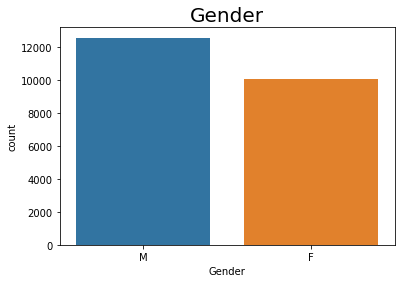

In [ ]:
%matplotlib inline

sns.countplot(Data['Gender'])
plt.title("Gender", y=1, fontdict={"fontsize": 20})

## Encoding the categorical variables

In [ ]:
Datanew1 = pd.get_dummies(Datanew1,columns = ['Gender','Marital','Active_Mortgage_Indicator'], drop_first = True)
Datanew1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22620 entries, 214 to 203712
Columns: 357 entries, ETD60_6MTH to Active_Mortgage_Indicator_Y
dtypes: float64(114), int64(237), uint8(6)
memory usage: 60.9 MB


## Dropping Duplicate Values (If needed)

In [ ]:
Datanew1.drop_duplicates()

,ETD60_6MTH,Ever_NetNew,age,Num_of_Dependents,c_2to3yr_bal_gt0,c_2to3yr_bal_gt500,c_2to3yr_bal_gt1000,c_CurrentBalance,c_OriginalAmount,c_comp_2to3yr_bal_gt0,c_comp_2to3yr_bal_gt500,c_comp_curBal,c_comp_last_Date_lt_1yr,c_comp_lt_1yr_bal_gt0,c_last_DateReport_lt_1yr,c_lt_1yr_bal_gt0,c_lt_1yr_bal_gt500,c_lt_1yr_bal_gt1000,c_num_of_comp_bal_gt0,c_num_of_col_bal_gt0,AGG1Ratio,AGG1Slope123,AGG1SlopeRatio,AGG2Ratio,AGG2Slope123,AGG2SlopeRatio,AGG301,AGG3Ratio,AGG3Slope123,AGG3SlopeRatio,AGG4Ratio,AGG4Slope123,AGG4SlopeRatio,AGG5Ratio,AGG5Slope123,AGG5SlopeRatio,AGG6Ratio,AGG6Slope123,AGG6SlopeRatio,AGG701,...,GO15,GO16,GO19,GO31,IN01,IN02,IN05,IN18,IN21,IN36,IN51,IN64,IN65,IN76,IN78,IN79,PR09,PR31,PR32,PR118_yrs,PR35_yrs,PR36_yrs,PR38_yrs,PR42,RE01,RE02,RE05,RE06,RE334,RR01,RR02,MS01,MS28,SL02,Gender_M,Marital_D,Marital_M,Marital_S,Marital_Z,Active_Mortgage_Indicator_Y
EID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
214,0,0,54,2,0,0,0,-1,-1,0,0,-1,0,0,0,0,0,0,0,0,0.0,-6600,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,-105,0.0,0,0,0.0,0,...,0,0,0,0,14,1,0,0,15,56,0,0,0,0,0,0,0,0,0,4,4,7,999,0,12,1,0,0,27458,4,0,1,0,0,1,1,0,0,0,1
216,1,0,37,2,0,0,0,1547,1377,0,0,-1,0,0,0,0,0,0,0,1,30.0,495,0.0,0.0,0,0.0,0,0.0,0,0.0,45.0,8580,-30.0,0.0,75,0.0,0,0,0.0,0,...,0,2,0,7,14,5,3,0,1,49,0,0,0,0,0,0,1,0,0,3,3,4,5,1,4,1,0,0,1551,1,0,0,0,0,0,0,0,1,0,0
240,0,0,76,0,0,0,0,0,998,0,0,-1,0,0,0,0,0,0,0,0,0.0,2715,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,135,0.0,0.0,-15,0.0,0,0,0.0,0,...,0,1,1,2,10,1,0,0,5,14,1,0,0,0,0,0,3,0,0,5,5,12,4,0,2,1,0,0,3047,1,0,0,0,0,1,0,1,0,0,0
243,0,0,31,0,0,0,0,-1,-1,0,0,-1,0,0,0,0,0,0,0,0,0.0,8940,0.0,0.0,0,0.0,904,-1335.0,-60,15.0,0.0,0,0.0,0.0,60,0.0,0,0,0.0,0,...,0,0,1,2,9,4,0,0,5,999,0,0,0,0,0,0,0,0,0,999,999,999,999,0,2,1,0,0,4599,1,0,0,0,1,1,0,0,1,0,0
250,0,0,51,0,0,0,0,-1,-1,0,0,-1,0,0,0,0,0,0,0,0,-17865.0,4245,NaN,-6555.0,2310,NaN,0,0.0,0,NaN,-2235.0,75,NaN,-4260.0,1425,NaN,-4245,1500,NaN,0,...,0,1,0,1,12,5,2,0,1,999,1,0,0,0,0,0,0,0,0,999,999,999,999,0,5,4,0,1,12997,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203660,0,0,49,0,0,0,0,0,662,0,0,0,1,0,1,0,0,0,0,0,-1380.0,-2115,NaN,-1155.0,-750,NaN,0,0.0,0,NaN,-1050.0,1185,NaN,-405.0,-675,NaN,-1155,-750,NaN,0,...,1,1,1,5,4,1,2,0,2,999,0,0,0,0,0,0,1,0,0,9,9,12,1,0,2,2,1,1,2800,0,0,0,0,0,1,0,0,1,0,0
203674,0,0,28,0,0,0,0,0,1308,0,0,-1,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0,NaN,0,NaN,0,NaN,0.0,0,0.0,0.0,0,0.0,0,0,NaN,0,...,0,0,0,1,0,0,0,0,999,999,0,0,0,0,0,0,1,0,0,999,999,999,5,0,2,1,0,0,1300,0,0,0,0,0,1,0,1,0,0,0
203675,0,0,57,0,0,0,0,0,827,0,0,-1,0,0,0,0,0,0,0,0,0.0,375,0.0,0.0,0,0.0,5741,NaN,-75,NaN,0.0,0,0.0,0.0,-75,0.0,0,0,0.0,5741,...,0,0,1,1,3,1,0,0,7,999,0,0,0,0,0,0,1,0,0,999,999,999,4,0,3,0,0,0,6000,1,0,0,0,0,1,0,1,0,0,0


In [ ]:
Datanew1.shape

(22620, 357)

## Checking the missing values in data set

In [ ]:
def percentage_of_miss():
  df1=Datanew1[Datanew1.columns[Datanew1.isnull().sum()>=1]]
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
  missing_Data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_Data)

In [ ]:
percentage_of_miss()

,Number of Missing,Percentage
AGG6SlopeRatio,12461,0.550884
AGG2SlopeRatio,11321,0.500486
AGG8SlopeRatio,11036,0.487887
AGG7SlopeRatio,10684,0.472325
AGGS1SlopeRatio,9755,0.431256
REVSSlopeRatio,9141,0.404111
AGG3SlopeRatio,7723,0.341424
AGG4SlopeRatio,7152,0.316180
AGG5SlopeRatio,6468,0.285942
AGG3Ratio,4742,0.209637


## Checking Null Values in the data set

In [ ]:
Datanew1.apply(lambda x:sum(x.isnull()))

ETD60_6MTH                     0
Ever_NetNew                    0
age                            0
Num_of_Dependents              0
c_2to3yr_bal_gt0               0
                              ..
Marital_D                      0
Marital_M                      0
Marital_S                      0
Marital_Z                      0
Active_Mortgage_Indicator_Y    0
Length: 357, dtype: int64

## Filling the missing values with 0 , (Also can be filled with mean median & mode variable by variable)

In [ ]:
df = Datanew1.apply (pd.to_numeric, errors='coerce')
df = Datanew1.fillna(0)

print (df)

        ETD60_6MTH  Ever_NetNew  ...  Marital_Z  Active_Mortgage_Indicator_Y
EID                              ...                                        
214              0            0  ...          0                            1
216              1            0  ...          0                            0
240              0            0  ...          0                            0
243              0            0  ...          0                            0
250              0            0  ...          0                            0
...            ...          ...  ...        ...                          ...
203660           0            0  ...          0                            0
203674           0            0  ...          0                            0
203675           0            0  ...          0                            0
203687           0            0  ...          0                            0
203712           1            0  ...          0                            0

In [ ]:
df.head(50)

,ETD60_6MTH,Ever_NetNew,age,Num_of_Dependents,c_2to3yr_bal_gt0,c_2to3yr_bal_gt500,c_2to3yr_bal_gt1000,c_CurrentBalance,c_OriginalAmount,c_comp_2to3yr_bal_gt0,c_comp_2to3yr_bal_gt500,c_comp_curBal,c_comp_last_Date_lt_1yr,c_comp_lt_1yr_bal_gt0,c_last_DateReport_lt_1yr,c_lt_1yr_bal_gt0,c_lt_1yr_bal_gt500,c_lt_1yr_bal_gt1000,c_num_of_comp_bal_gt0,c_num_of_col_bal_gt0,AGG1Ratio,AGG1Slope123,AGG1SlopeRatio,AGG2Ratio,AGG2Slope123,AGG2SlopeRatio,AGG301,AGG3Ratio,AGG3Slope123,AGG3SlopeRatio,AGG4Ratio,AGG4Slope123,AGG4SlopeRatio,AGG5Ratio,AGG5Slope123,AGG5SlopeRatio,AGG6Ratio,AGG6Slope123,AGG6SlopeRatio,AGG701,...,GO15,GO16,GO19,GO31,IN01,IN02,IN05,IN18,IN21,IN36,IN51,IN64,IN65,IN76,IN78,IN79,PR09,PR31,PR32,PR118_yrs,PR35_yrs,PR36_yrs,PR38_yrs,PR42,RE01,RE02,RE05,RE06,RE334,RR01,RR02,MS01,MS28,SL02,Gender_M,Marital_D,Marital_M,Marital_S,Marital_Z,Active_Mortgage_Indicator_Y
EID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
214,0,0,54,2,0,0,0,-1,-1,0,0,-1,0,0,0,0,0,0,0,0,0.0,-6600,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,-105,0.0,0,0,0.0,0,...,0,0,0,0,14,1,0,0,15,56,0,0,0,0,0,0,0,0,0,4,4,7,999,0,12,1,0,0,27458,4,0,1,0,0,1,1,0,0,0,1
216,1,0,37,2,0,0,0,1547,1377,0,0,-1,0,0,0,0,0,0,0,1,30.0,495,0.0,0.0,0,0.0,0,0.0,0,0.0,45.0,8580,-30.0,0.0,75,0.0,0,0,0.0,0,...,0,2,0,7,14,5,3,0,1,49,0,0,0,0,0,0,1,0,0,3,3,4,5,1,4,1,0,0,1551,1,0,0,0,0,0,0,0,1,0,0
240,0,0,76,0,0,0,0,0,998,0,0,-1,0,0,0,0,0,0,0,0,0.0,2715,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,135,0.0,0.0,-15,0.0,0,0,0.0,0,...,0,1,1,2,10,1,0,0,5,14,1,0,0,0,0,0,3,0,0,5,5,12,4,0,2,1,0,0,3047,1,0,0,0,0,1,0,1,0,0,0
243,0,0,31,0,0,0,0,-1,-1,0,0,-1,0,0,0,0,0,0,0,0,0.0,8940,0.0,0.0,0,0.0,904,-1335.0,-60,15.0,0.0,0,0.0,0.0,60,0.0,0,0,0.0,0,...,0,0,1,2,9,4,0,0,5,999,0,0,0,0,0,0,0,0,0,999,999,999,999,0,2,1,0,0,4599,1,0,0,0,1,1,0,0,1,0,0
250,0,0,51,0,0,0,0,-1,-1,0,0,-1,0,0,0,0,0,0,0,0,-17865.0,4245,0.0,-6555.0,2310,0.0,0,0.0,0,0.0,-2235.0,75,0.0,-4260.0,1425,0.0,-4245,1500,0.0,0,...,0,1,0,1,12,5,2,0,1,999,1,0,0,0,0,0,0,0,0,999,999,999,999,0,5,4,0,1,12997,0,0,0,0,0,1,0,0,1,0,0
288,0,0,59,0,0,0,0,-1,-1,0,0,-1,0,0,0,0,0,0,0,0,0.0,5535,0.0,0.0,0,0.0,0,0.0,0,0.0,75.0,390,0.0,0.0,15,0.0,0,0,0.0,0,...,0,0,1,2,21,3,1,0,2,999,1,0,0,0,0,0,0,0,0,3,3,6,999,0,20,1,0,0,204400,6,0,0,0,0,1,0,1,0,0,0
294,0,0,36,0,0,0,0,0,1845,0,0,0,0,0,0,0,0,0,0,0,-7545.0,2085,0.0,-750.0,0,0.0,0,0.0,0,0.0,-150.0,165,0.0,-750.0,0,0.0,-750,0,0.0,0,...,0,1,1,2,13,2,0,0,5,999,1,0,0,0,0,0,1,0,0,6,6,7,5,0,9,2,0,0,14026,1,0,0,0,0,1,0,0,1,0,0
295,1,0,51,3,0,0,0,2392,2353,0,0,-1,0,0,1,1,1,1,0,2,0.0,855,0.0,0.0,0,0.0,1728,0.0,495,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,-2,...,0,1,1,0,7,0,0,0,101,999,0,0,0,0,0,0,2,1,0,999,999,999,0,2,13,0,0,0,22615,5,0,0,0,0,1,0,1,0,0,0
300,1,0,44,2,0,0,0,0,2005,0,0,-1,0,0,0,0,0,0,0,0,15.0,8910,0.0,-405.0,0,0.0,0,0.0,0,0.0,-1980.0,5160,0.0,0.0,0,0.0,-405,0,0.0,0,...,0,2,1,4,21,5,3,0,1,999,2,0,0,0,0,0,1,0,0,999,999,999,1,0,4,1,0,0,10300,0,0,0,0,0,1,0,1,0,0,0


## Splitting the variables into X and Y

In [ ]:
X= df.drop('ETD60_6MTH', axis=1)
y= df['ETD60_6MTH']

## Splitting the Data into Test Train Split i took 30% as test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Standard scaler which helps to normalize all the values to one constant

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# <center>Model - Logistic Regression<center>

## Fitting the model into train data

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Training data Score

In [ ]:
reg.score(X_train,y_train)

0.7387267904509284

## Test Data Score

In [ ]:
reg.score(X_test,y_test)

0.7385057471264368

Y - Prediction

In [ ]:
y_pred = reg.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Confusion matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[6135   19]
 [ 616   16]]


## Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9064249926318891


## Classification Report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6154
           1       0.46      0.03      0.05       632

    accuracy                           0.91      6786
   macro avg       0.68      0.51      0.50      6786
weighted avg       0.87      0.91      0.87      6786



## K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg,X,y,cv=4)

array([0.90946065, 0.90928382, 0.90910698, 0.90857648])

In [ ]:
cross_val_score(reg,X,y,cv=4).mean()

0.9091069849690538

## Roc Curve 

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred = reg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

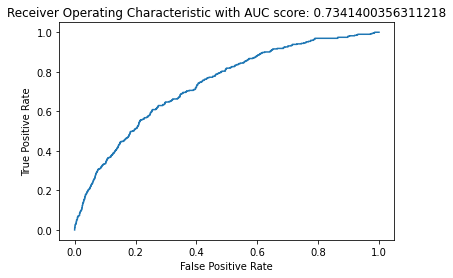

In [ ]:
%matplotlib inline
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic with AUC score: {}'.format(roc_auc_score(y_test,y_pred)))
plt.show()

## ----------------------------------------------------------------------End--------------------------------------------------------------------

## Practice Codes

In [ ]:
from sklearn.model_selection import GridSearchCV
rndclCV = RandomForestClassifier(random_state=0)

grid_params={'n_estimators': [10,20,30,40,50],
             'max_depth':[5,10,15]}

In [ ]:
ran = GridSearchCV(rndclCV, grid_params, scoring='accuracy', cv=4)
ran.fit(X_train,y_train)

0.9106985273893181

In [ ]:
ran.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
ran.best_score_ 

0.9106985273893181

In [ ]:
ran.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10, n_estimators = 10, criterion = 'gini', random_state = 0)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfc.score(X_test,y_test)

0.906572354848217

In [ ]:
rfc.score(X_train,y_train)

0.9146141215106732

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,rfc_pred))

[[6152    2]
 [ 632    0]]


In [ ]:
accuracy_score(y_test, rfc_pred)

0.906572354848217

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6154
           1       0.00      0.00      0.00       632

    accuracy                           0.91      6786
   macro avg       0.45      0.50      0.48      6786
weighted avg       0.82      0.91      0.86      6786



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(ran,X,y,cv=4) 

array([0.90963749, 0.90963749, 0.90946065, 0.90946065])

In [ ]:
cross_val_score(ran, X,y,cv=4).mean()

0.9095490716180372

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred = ran.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

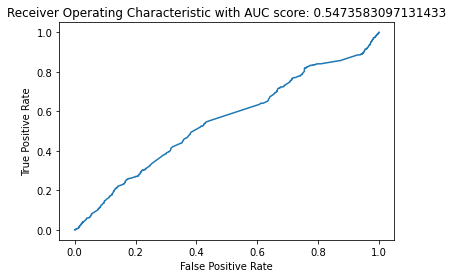

In [ ]:
%matplotlib inline
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic with AUC score: {}'.format(roc_auc_score(y_test,y_pred)))
plt.show()